# Comparision based on bivariate Gaussians

This Notebook tries to compare different 2D correlation metrics.
To do so, bivariate Gaussians with varying equicorrelation are generated, and the result of the different correlation metrics is plotted.
Each metric is normalised onto the range [0,1].



In [1]:
x_title = "$\\alpha$"
y_title = "$corr(X,Y)$"

In [2]:
%matplotlib inline

import pycopcor.marginal as pcm
import pycopcor.copula.wolff as pcw
import pycopcor.copula.entropy as pce

import numpy

import matplotlib.pyplot as pp
import collections

import scipy.stats

import pymit


In [3]:
n = 10000

rng = numpy.random.default_rng()

ref = rng.normal(0,1,n)
f_ref = pcm.density(ref)
i_cd_ref_e = pce.empirical_2d(f_ref,f_ref)
i_cd_ref_h = pce.histogram_2d(f_ref,f_ref)

norm_gauss = lambda x: numpy.sqrt(1 - numpy.exp(-2*x))
norm_max_e = lambda x: x/i_cd_ref_e
norm_max_h = lambda x: x/i_cd_ref_h

print("i_cd_ref_e", i_cd_ref_e)
print("i_cd_ref_h", i_cd_ref_h)


i_cd_ref_e 2.201970781906647
i_cd_ref_h 2.302585092994046


In [7]:

def process_data(alphas, create_data):
    results = collections.defaultdict(list)
    colors = {}

    for alpha in alphas:
        X, title = create_data(alpha, n)
        
        fx_0 = pcm.density(X[:,0])
        fx_1 = pcm.density(X[:,1])

        for key in copula_funs:
            c, fun = copula_funs[key]
            res = fun(fx_0, fx_1)
            results[key].append(res)
            colors[key] = c
        
        for key in other_funs:
            c, fun = other_funs[key]
            res = fun(X[:,0], X[:,1])
            results[key].append(res)
            colors[key] = c
    return results, colors, title

def plot_data(alphas, results, colors, title, ylim = [-0.1,1.1], xlim = [-0.1,1.1]):
    pp.figure()

    pp.ylim(ylim)
    pp.xlim(xlim)

    for key in results:
        pp.plot(alphas,results[key],color=colors[key][0],marker=colors[key][1],linestyle="dotted" ,label=key)

    pp.plot(alphas,alphas, "--" ,label="Given alpha")
    pp.ylabel(y_title)
    pp.xlabel(x_title)
    pp.title(title)
    pp.legend()
    pp.show()



In [48]:
copula_funs = {
    "$I_{cd,e,NormGauss}$"  : (("tab:blue",     "."), lambda fx_0,fx_1: norm_gauss(pce.empirical_2d(fx_0,fx_1))), 
    "$I_{cd,h,NormGauss}$"  : (("tab:blue",     "x"), lambda fx_0,fx_1: norm_gauss(pce.histogram_2d(fx_0,fx_1))) , 
    "$I_{cd,e,NormMax}$"    : (("tab:orange",   "."), lambda fx_0,fx_1: norm_max_e(pce.empirical_2d(fx_0,fx_1))) , 
    "$I_{cd,h,NormMax}$"    : (("tab:orange",   "x"), lambda fx_0,fx_1: norm_max_h(pce.histogram_2d(fx_0,fx_1))) , 
    "$I_{\sigma}$"          : (("tab:green",    "x"), lambda fx_0,fx_1: pcw.sigma(fx_0,fx_1)) ,
    "$I_{\gamma}$"          : (("tab:red",      "x"), lambda fx_0,fx_1: pcw.gamma(fx_0,fx_1))
    }

other_funs = {
    "$|\\rho(X,Y)|$"        : (("tab:purple",   "v"), lambda x,y : numpy.abs(scipy.stats.pearsonr(x,y)[0])),
    "$I_{H,10}$"            : (("tab:brown",    "^"), lambda X,Y : pymit.I(X,Y,bins=10)),
    "$\\tau$"               : (("tab:olive",    "<"), lambda x,y : scipy.stats.kendalltau(x,y)[0]),
    #"$I_{H,20}$": ("r^", lambda X,Y : pymit.I(X,Y,bins=20)),
    #"$I_{H,100}$": ("g^", lambda X,Y : pymit.I(X,Y,bins=100)),
}


/tmp/ipykernel_419/3205463026.py:10: RuntimeWarning: invalid value encountered in sqrt
  norm_gauss = lambda x: numpy.sqrt(1 - numpy.exp(-2*x))


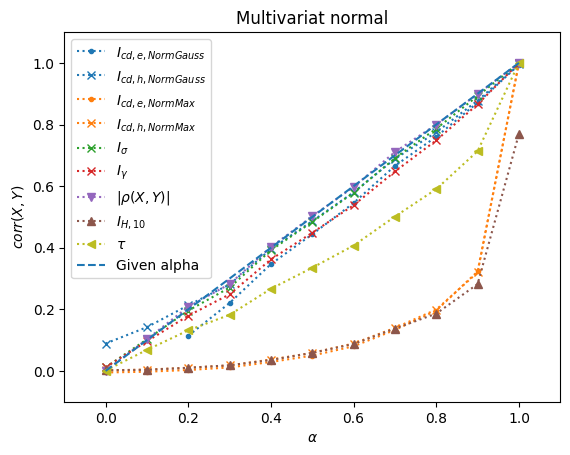

In [49]:
def create_gaussian(corr = 1, n = 10000):
    rng = numpy.random.default_rng()
    mean = (0, 0)

    cov = [[1, corr], [corr, 1]]
    x = rng.multivariate_normal(mean, cov, (n))
    
    return x, "Multivariat normal"


alphas = numpy.linspace(0,1,11)

modified_data = lambda alpha, n : create_gaussian(alpha, n)
data_for_plot = process_data(alphas, modified_data)
plot_data(alphas, *data_for_plot)


## Comparision between empirical and histogram method to calculate the copula entropy

### Different values for offset $o$

In [41]:
copula_funs = {
    "$I_{cd,e,NormGauss,50}$"  : (("tab:red",     "."), lambda fx_0,fx_1: norm_gauss(pce.empirical_2d(fx_0,fx_1,offset=50))), 
    "$I_{cd,e,NormGauss,100}$"  : (("tab:orange",     "."), lambda fx_0,fx_1: norm_gauss(pce.empirical_2d(fx_0,fx_1,offset=100))), 
    "$I_{cd,e,NormGauss,150}$"  : (("tab:purple",     "."), lambda fx_0,fx_1: norm_gauss(pce.empirical_2d(fx_0,fx_1,offset=150))), 
    "$I_{cd,h,NormGauss}$"  : (("tab:blue",     "x"), lambda fx_0,fx_1: norm_gauss(pce.histogram_2d(fx_0,fx_1))) , 
    }

other_funs = {
    
}


/tmp/ipykernel_419/3205463026.py:10: RuntimeWarning: invalid value encountered in sqrt
  norm_gauss = lambda x: numpy.sqrt(1 - numpy.exp(-2*x))


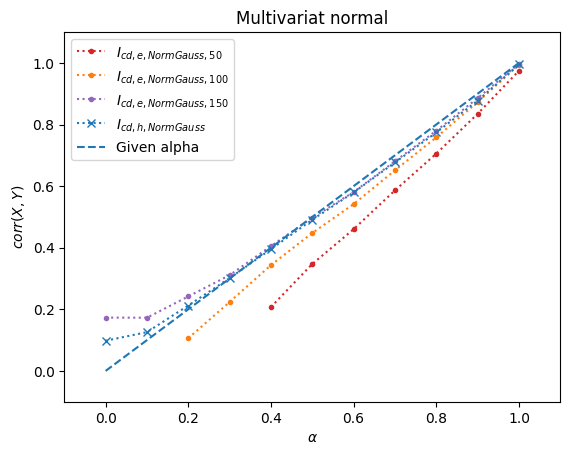

In [42]:
def create_gaussian(corr = 1, n = 10000):
    rng = numpy.random.default_rng()
    mean = (0, 0)

    cov = [[1, corr], [corr, 1]]
    x = rng.multivariate_normal(mean, cov, (n))
    
    return x, "Multivariat normal"


alphas = numpy.linspace(0,1,11)

modified_data = lambda alpha, n : create_gaussian(alpha, n)
data_for_plot = process_data(alphas, modified_data)
plot_data(alphas, *data_for_plot)


### Small n

In [43]:
copula_funs = {
    "$I_{cd,e,NormGauss,50}$"  : (("tab:red",     "."), lambda fx_0,fx_1: norm_gauss(pce.empirical_2d(fx_0,fx_1,offset=50))), 
    "$I_{cd,e,NormGauss,100}$"  : (("tab:orange",     "."), lambda fx_0,fx_1: norm_gauss(pce.empirical_2d(fx_0,fx_1,offset=100))), 
    "$I_{cd,e,NormGauss,150}$"  : (("tab:purple",     "."), lambda fx_0,fx_1: norm_gauss(pce.empirical_2d(fx_0,fx_1,offset=150))), 
    "$I_{cd,h,NormGauss}$"  : (("tab:blue",     "x"), lambda fx_0,fx_1: norm_gauss(pce.histogram_2d(fx_0,fx_1))) , 
    }


/tmp/ipykernel_419/3205463026.py:10: RuntimeWarning: invalid value encountered in sqrt
  norm_gauss = lambda x: numpy.sqrt(1 - numpy.exp(-2*x))


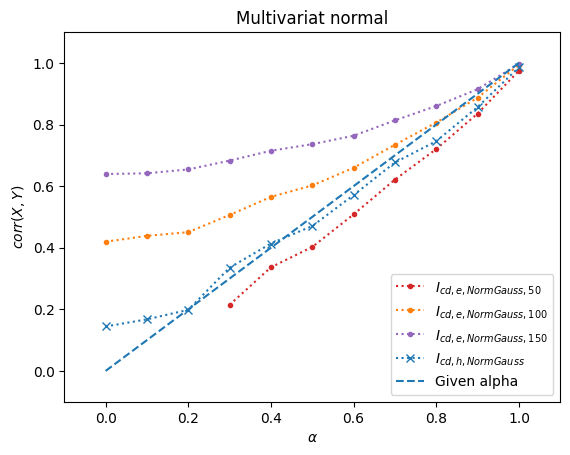

In [47]:
def create_gaussian(corr = 1, n = 10000):
    rng = numpy.random.default_rng()
    mean = (0, 0)

    cov = [[1, corr], [corr, 1]]
    x = rng.multivariate_normal(mean, cov, (n))
    
    return x, "Multivariat normal"


alphas = numpy.linspace(0,1,11)

modified_data = lambda alpha, n : create_gaussian(alpha, 1000)
data_for_plot = process_data(alphas, modified_data)
plot_data(alphas, *data_for_plot)


/tmp/ipykernel_419/3205463026.py:10: RuntimeWarning: invalid value encountered in sqrt
  norm_gauss = lambda x: numpy.sqrt(1 - numpy.exp(-2*x))


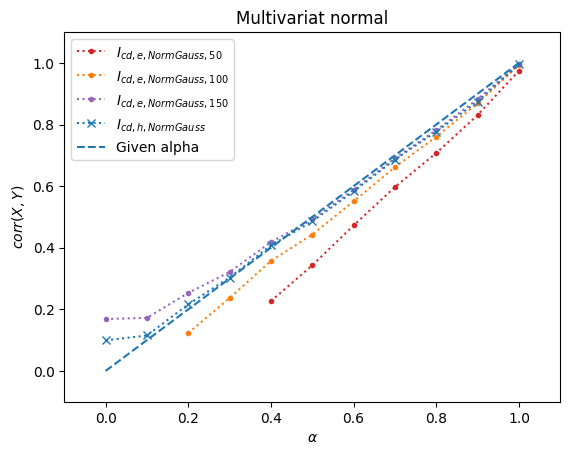

## Not normalised

A small experiment to compare the classical mutual infortmation and the mutual information based on copulas.

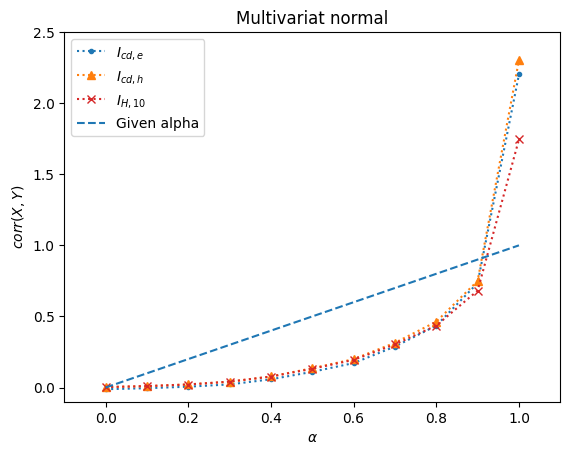

In [26]:


copula_funs = {
    "$I_{cd,e}$"    : (("tab:blue",   "."), lambda fx_0,fx_1: pce.empirical_2d(fx_0,fx_1)), 
    "$I_{cd,h}$"    : (("tab:orange", "^"), lambda fx_0,fx_1: pce.histogram_2d(fx_0,fx_1)), 
    }

other_funs = {
    "$I_{H,10}$"    : (("tab:red", "x"), lambda X,Y : pymit.I(X,Y,bins=10)*numpy.log(10)),
}

def create_gaussian(corr = 1, n = 10000):
    rng = numpy.random.default_rng()
    mean = (0, 0)

    cov = [[1, corr], [corr, 1]]
    x = rng.multivariate_normal(mean, cov, (n))
    
    return x, "Multivariat normal"


alphas = numpy.linspace(0,1,11)

modified_data = lambda alpha, n : create_gaussian(alpha, n)
data_for_plot = process_data(alphas, modified_data)

plot_data(alphas, *data_for_plot, ylim=[-0.1,2.5])
    
